<a href="https://colab.research.google.com/github/guhankesav/Yoga-Pose-Estimator/blob/main/Machine-Learning-and-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Guhan on Beast mode

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

# basic libraries
import numpy as np
import pandas as pd

#Visulaization modules
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from plotly.offline import iplot
import seaborn as sns

%matplotlib inline

#Data Preprocessing and Transformation Tools
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder,
                                   MinMaxScaler,
                                   RobustScaler)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


#Training and Testing
from sklearn import metrics
from sklearn.model_selection import train_test_split

##Importing the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/College_amrita/FInalYearproject/Data/CSV/yoga_nameindex.csv')


In [ ]:
df

,Pose,left_wrist_angle,right_wrist_angle,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_knee_angle,right_knee_angle,left_ankle_angle,right_ankle_angle,left_hip_angle,right_hip_angle
0,downdog,240.255119,219.064829,186.546291,179.376141,208.260226,156.583389,182.248808,181.818635,237.194045,265.140039,97.845802,85.783682
1,downdog,147.264774,154.936741,163.135131,152.664823,179.028436,187.064029,179.408472,180.649002,106.488878,85.529652,79.359123,98.865720
2,downdog,204.766079,204.057349,209.600922,208.148708,186.408119,171.864904,180.285860,186.046362,268.700678,255.039570,95.841898,83.899940
3,downdog,143.595911,146.162727,168.976544,165.766879,189.167956,182.282271,182.500618,185.901810,98.671915,95.920489,238.954509,300.089686
4,downdog,144.180542,138.206767,168.418526,167.773910,156.250100,203.840391,185.518514,185.448147,91.651908,83.828846,80.385431,98.972627
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,warrior2,198.070012,185.271524,174.961145,189.659893,96.576950,97.594643,257.819084,186.246052,138.767124,100.750967,156.370622,139.658970
885,warrior2,177.614056,172.647621,185.962278,180.441152,98.980126,106.122254,167.905243,108.708435,160.754169,204.563420,121.057633,161.291565
886,warrior2,190.407711,184.635463,169.905377,186.674469,96.089894,83.569341,236.500044,185.194429,152.850318,157.879055,150.309753,133.381905
887,warrior2,179.816947,173.290163,176.063600,185.025152,100.277495,96.583777,168.187607,110.901905,211.057415,203.648519,142.147121,146.587728


In [ ]:
df.dtypes

Pose                     object
left_wrist_angle        float64
right_wrist_angle       float64
left_elbow_angle        float64
right_elbow_angle       float64
left_shoulder_angle     float64
right_shoulder_angle    float64
left_knee_angle         float64
right_knee_angle        float64
left_ankle_angle        float64
right_ankle_angle       float64
left_hip_angle          float64
right_hip_angle         float64
dtype: object

In [ ]:
df.isnull().sum()

Pose                    0
left_wrist_angle        0
right_wrist_angle       0
left_elbow_angle        0
right_elbow_angle       0
left_shoulder_angle     0
right_shoulder_angle    0
left_knee_angle         0
right_knee_angle        0
left_ankle_angle        0
right_ankle_angle       0
left_hip_angle          0
right_hip_angle         0
dtype: int64

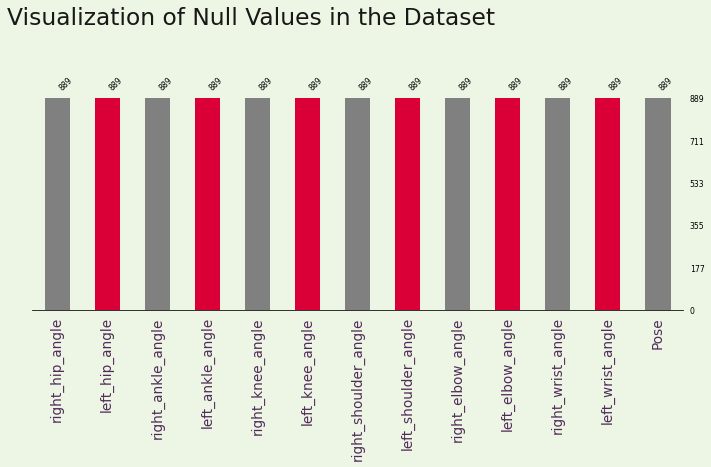

In [ ]:
color = ['grey','#DA0037','grey','#DA0037','grey','#DA0037','grey','#DA0037']
fig, ax = plt.subplots(figsize = (12,4), dpi = 70)
fig.patch.set_facecolor('#EDF6E5')
ax.set_facecolor('#EDF6E5')


msno.bar(df, sort = 'descending', 
         color = color, 
         ax = ax, fontsize =8,
         labels = 'off',filter = 'top')

ax.text(-1,1.35,'Visualization of Null Values in the Dataset',{'Size': 24,  'color':'black'},alpha = 0.9)
# ax.text(-1,1.2,' ',{'Size': 12,  'color':'black'}, alpha = 0.7)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, 
                   ha = 'center', **{'Size': 14,'weight':'normal','color':'#512b58'}, alpha = 1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

fig.show()

As the barchart suggest, there are No Null Values 

In [ ]:
dict = {0: 'downdog', 1: 'goddess', 2: 'plank', 3:  'warrior2'}

In [ ]:
downdog_df = df.loc[df['Pose'] == "downdog"]
goddess_df = df.loc[df['Pose'] == "goddess"]
plank_df = df.loc[df['Pose'] == "plank"]
warrior2_df = df.loc[df['Pose'] == "warrior2"]

#**VISUALIZING OUTLIERS** - downdog


**Box PLot**

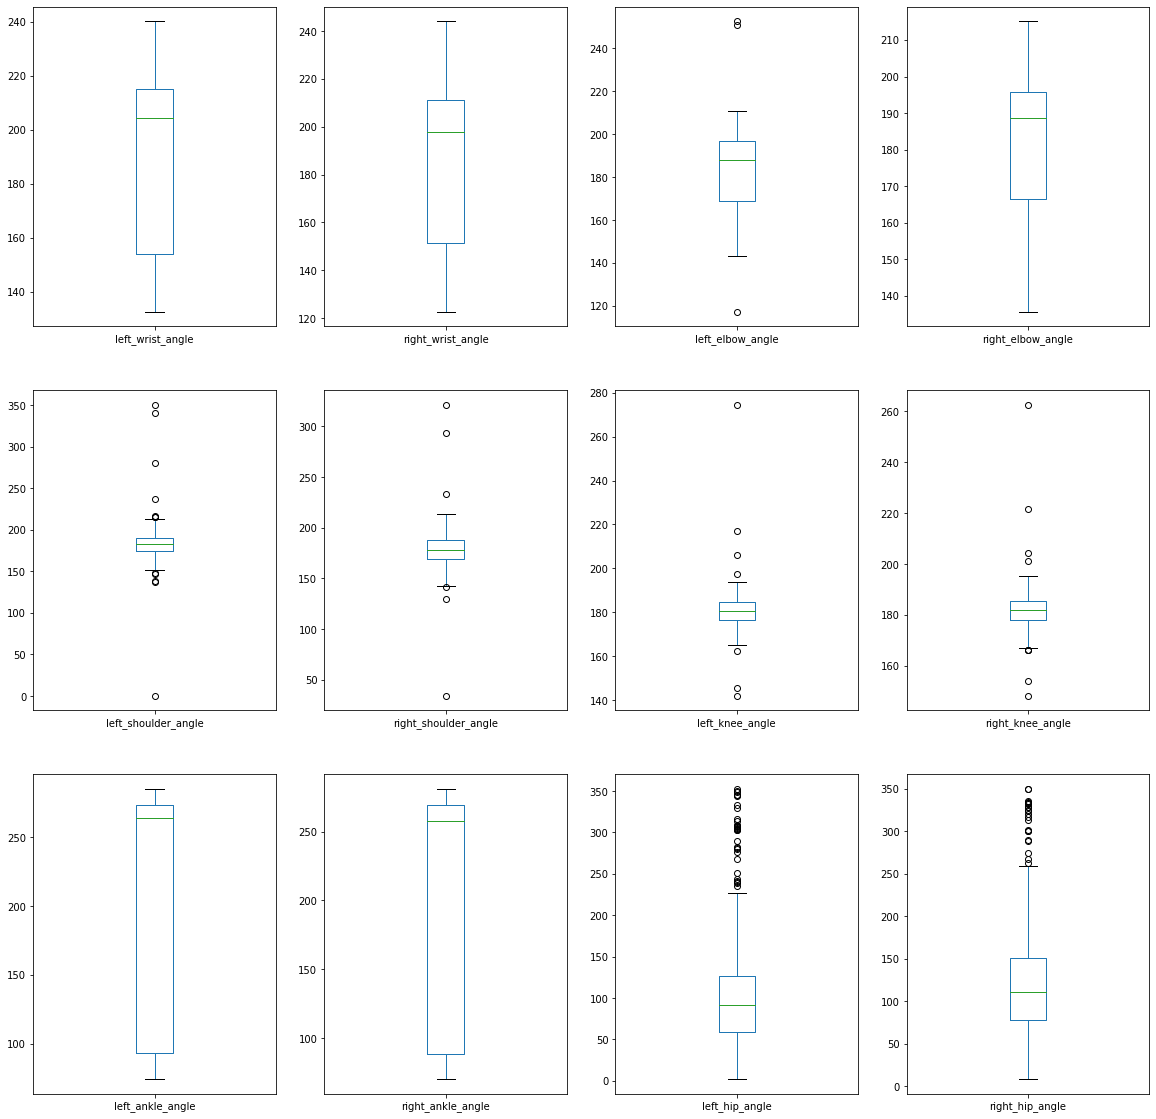

In [ ]:
num_df = downdog_df

num_df.plot(kind="box",layout=(3,4),subplots = True,figsize = (20,20),sharex= False)
plt.show()

**Density Plot**

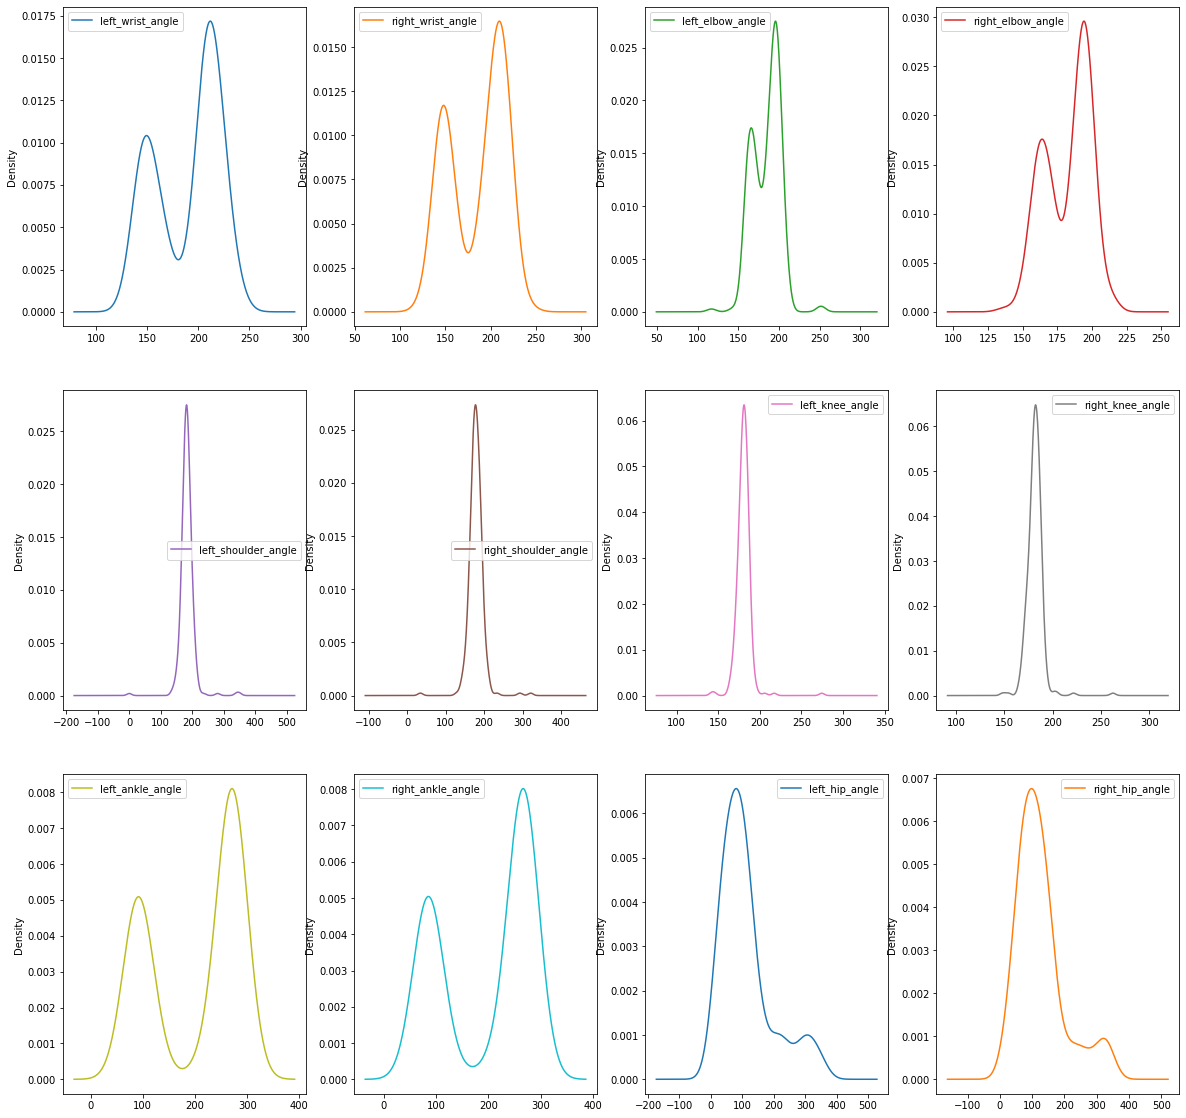

In [ ]:
num_df.plot(kind="density",layout=(3,4),subplots = True,figsize = (20,20),sharex= False)
plt.show()

In [ ]:
df.isnull().sum()

Pose                    0
left_wrist_angle        0
right_wrist_angle       0
left_elbow_angle        0
right_elbow_angle       0
left_shoulder_angle     0
right_shoulder_angle    0
left_knee_angle         0
right_knee_angle        0
left_ankle_angle        0
right_ankle_angle       0
left_hip_angle          0
right_hip_angle         0
dtype: int64

#**VISUALIZING OUTLIERS** - plank


**Box PLot**

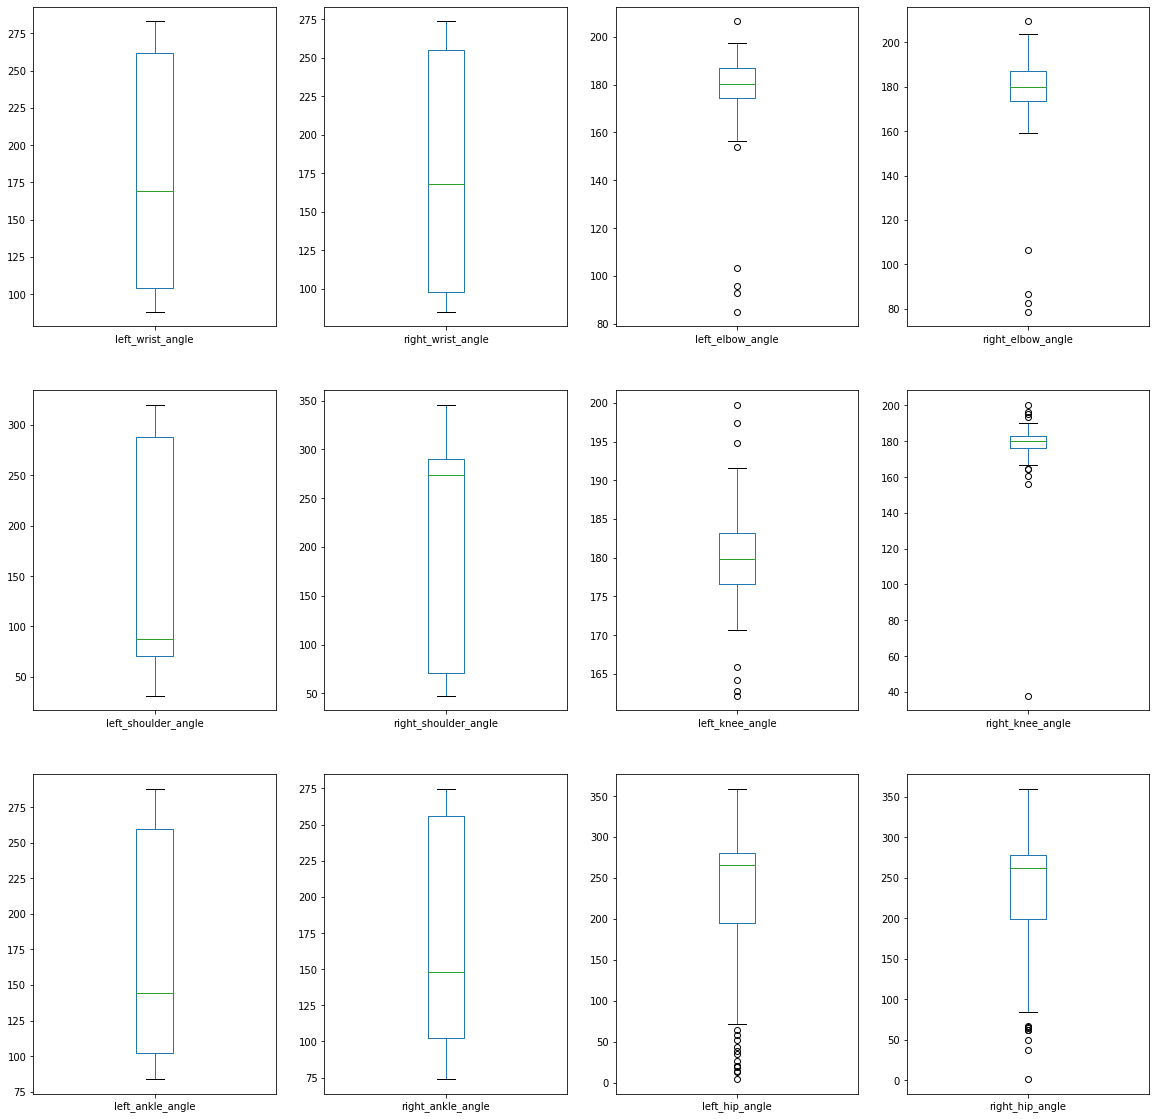

In [ ]:
num_df = plank_df

num_df.plot(kind="box",layout=(3,4),subplots = True,figsize = (20,20),sharex= False)
plt.show()

**Density Plot**

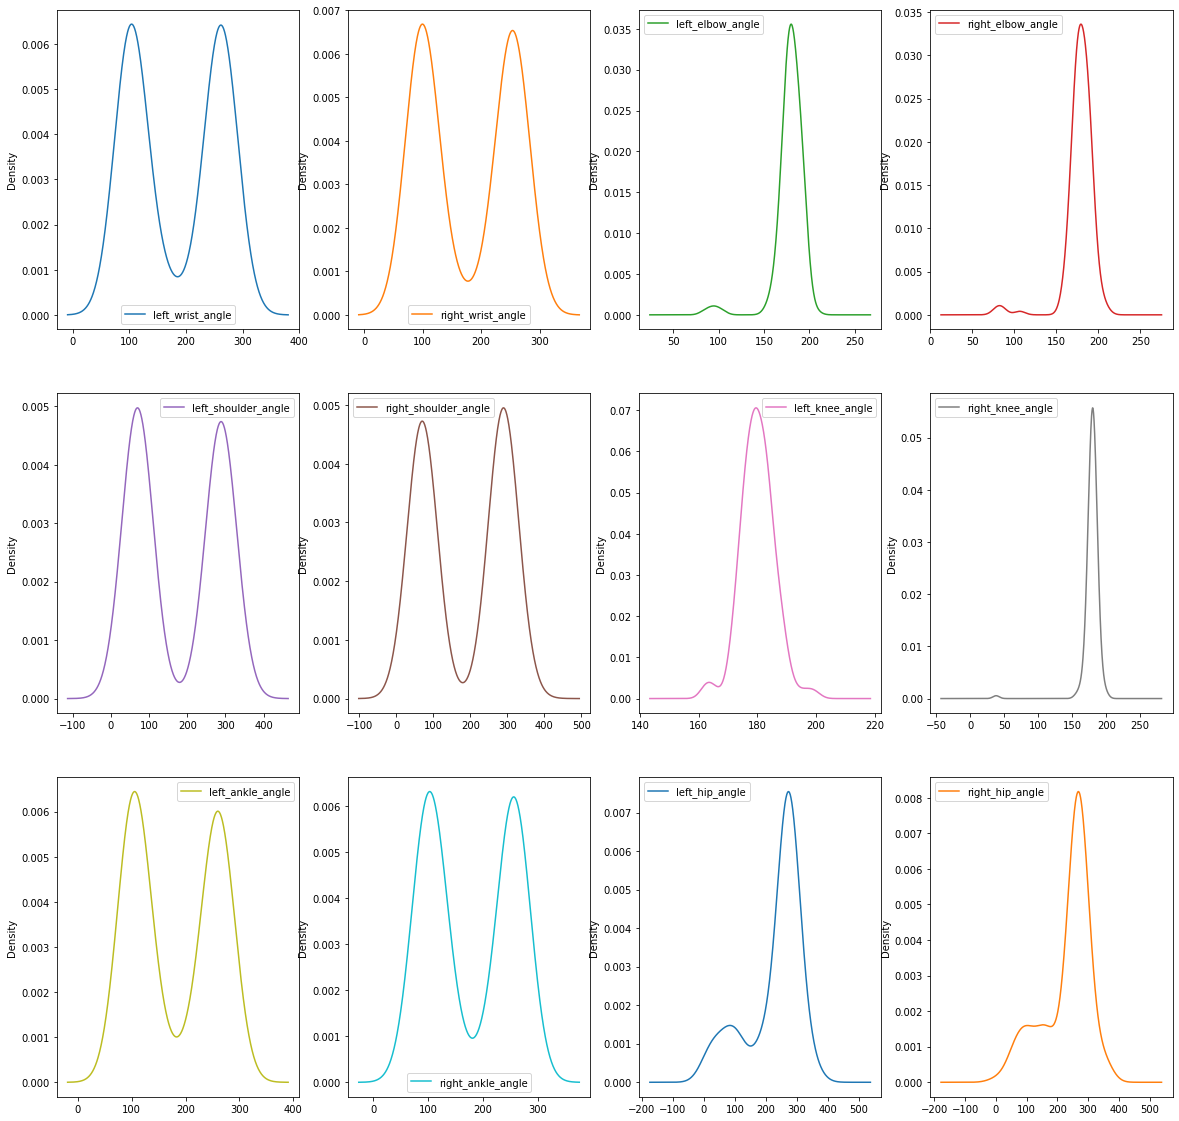

In [ ]:
num_df.plot(kind="density",layout=(3,4),subplots = True,figsize = (20,20),sharex= False)
plt.show()

In [ ]:
df.isnull().sum()

Pose                    0
left_wrist_angle        0
right_wrist_angle       0
left_elbow_angle        0
right_elbow_angle       0
left_shoulder_angle     0
right_shoulder_angle    0
left_knee_angle         0
right_knee_angle        0
left_ankle_angle        0
right_ankle_angle       0
left_hip_angle          0
right_hip_angle         0
dtype: int64

#**VISUALIZING OUTLIERS** - goddess


**Box PLot**

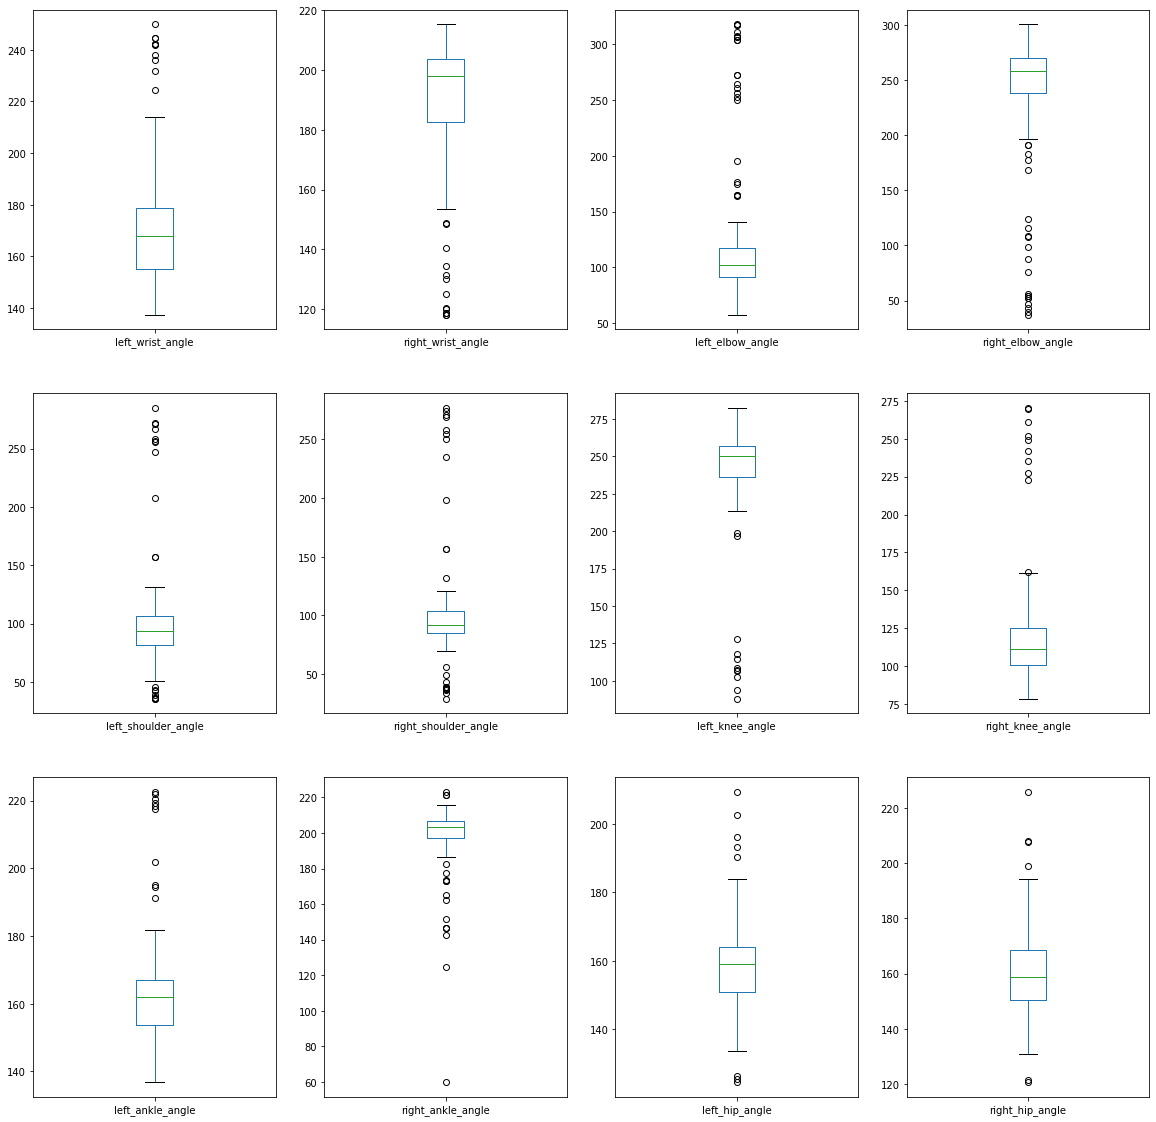

In [ ]:
num_df = goddess_df

num_df.plot(kind="box",layout=(3,4),subplots = True,figsize = (20,20),sharex= False)
plt.show()

**Density Plot**

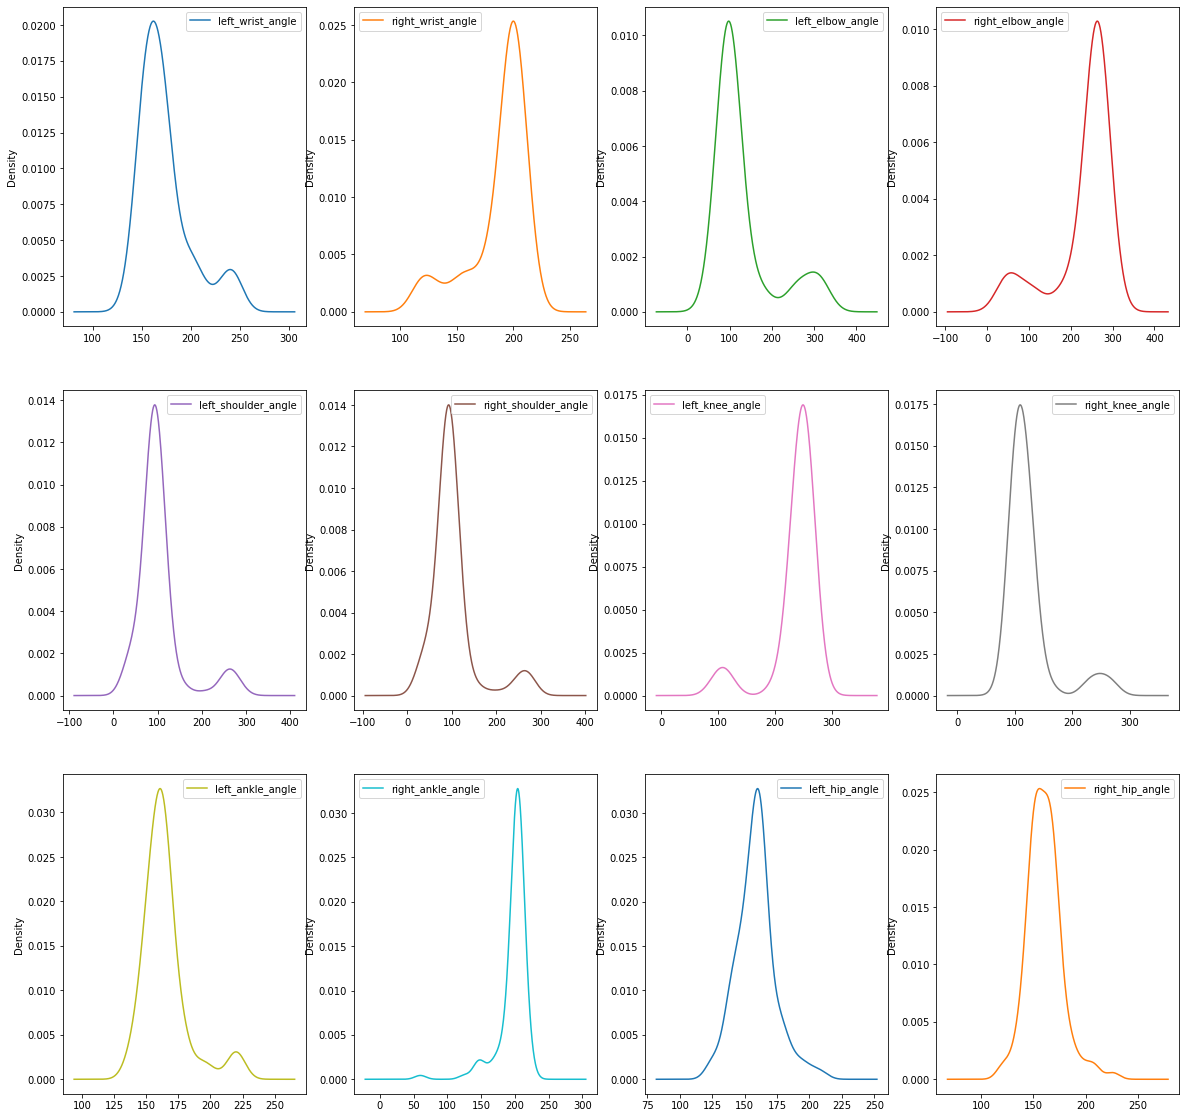

In [ ]:
num_df.plot(kind="density",layout=(3,4),subplots = True,figsize = (20,20),sharex= False)
plt.show()

In [ ]:
df.isnull().sum()

Pose                    0
left_wrist_angle        0
right_wrist_angle       0
left_elbow_angle        0
right_elbow_angle       0
left_shoulder_angle     0
right_shoulder_angle    0
left_knee_angle         0
right_knee_angle        0
left_ankle_angle        0
right_ankle_angle       0
left_hip_angle          0
right_hip_angle         0
dtype: int64

#**VISUALIZING OUTLIERS** - warrior2


**Box PLot**

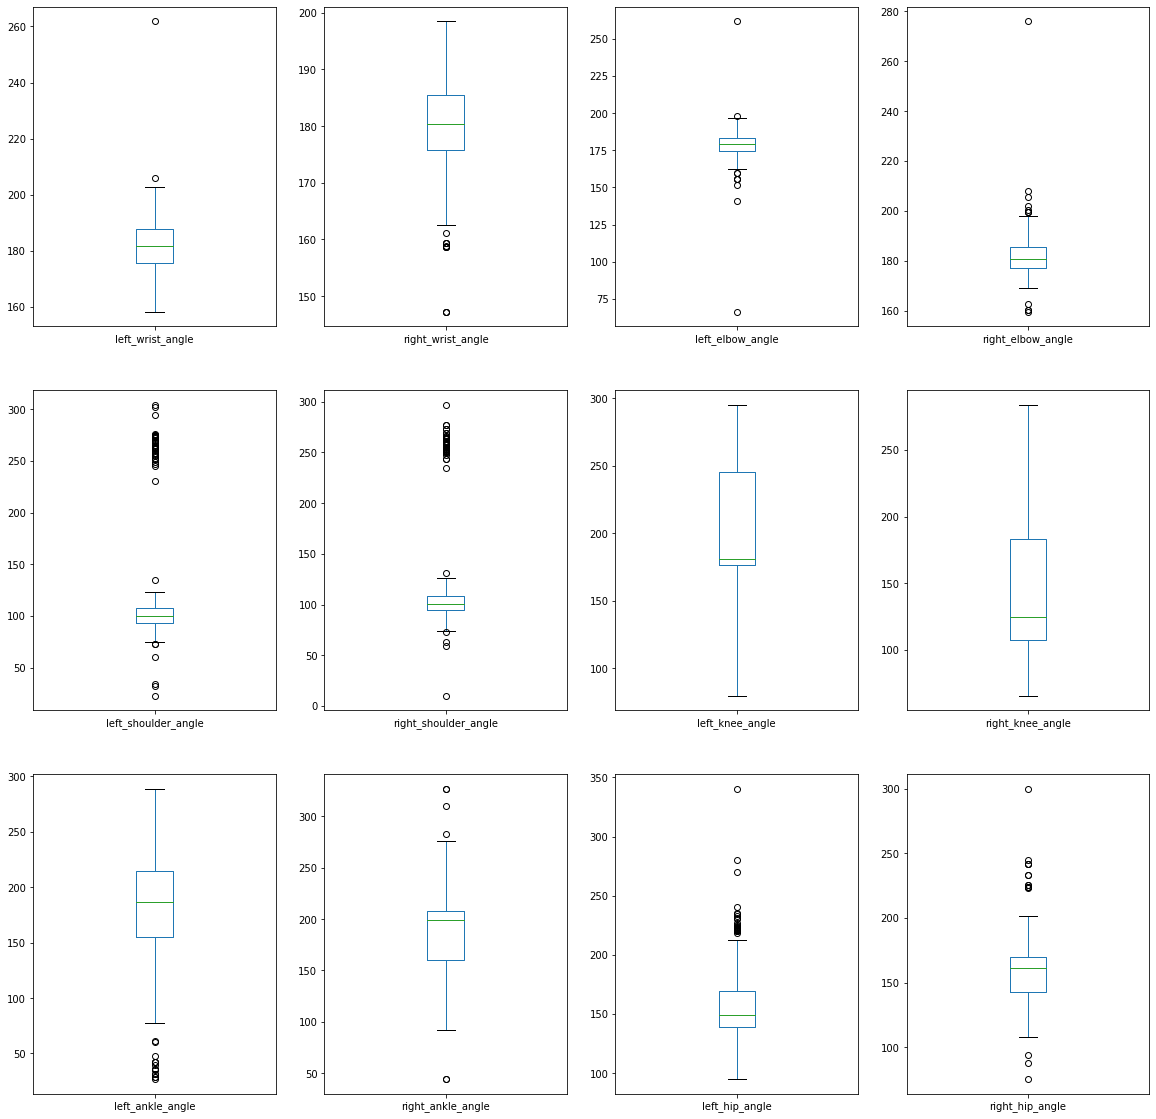

In [ ]:
num_df = warrior2_df

num_df.plot(kind="box",layout=(3,4),subplots = True,figsize = (20,20),sharex= False)
plt.show()

**Density Plot**

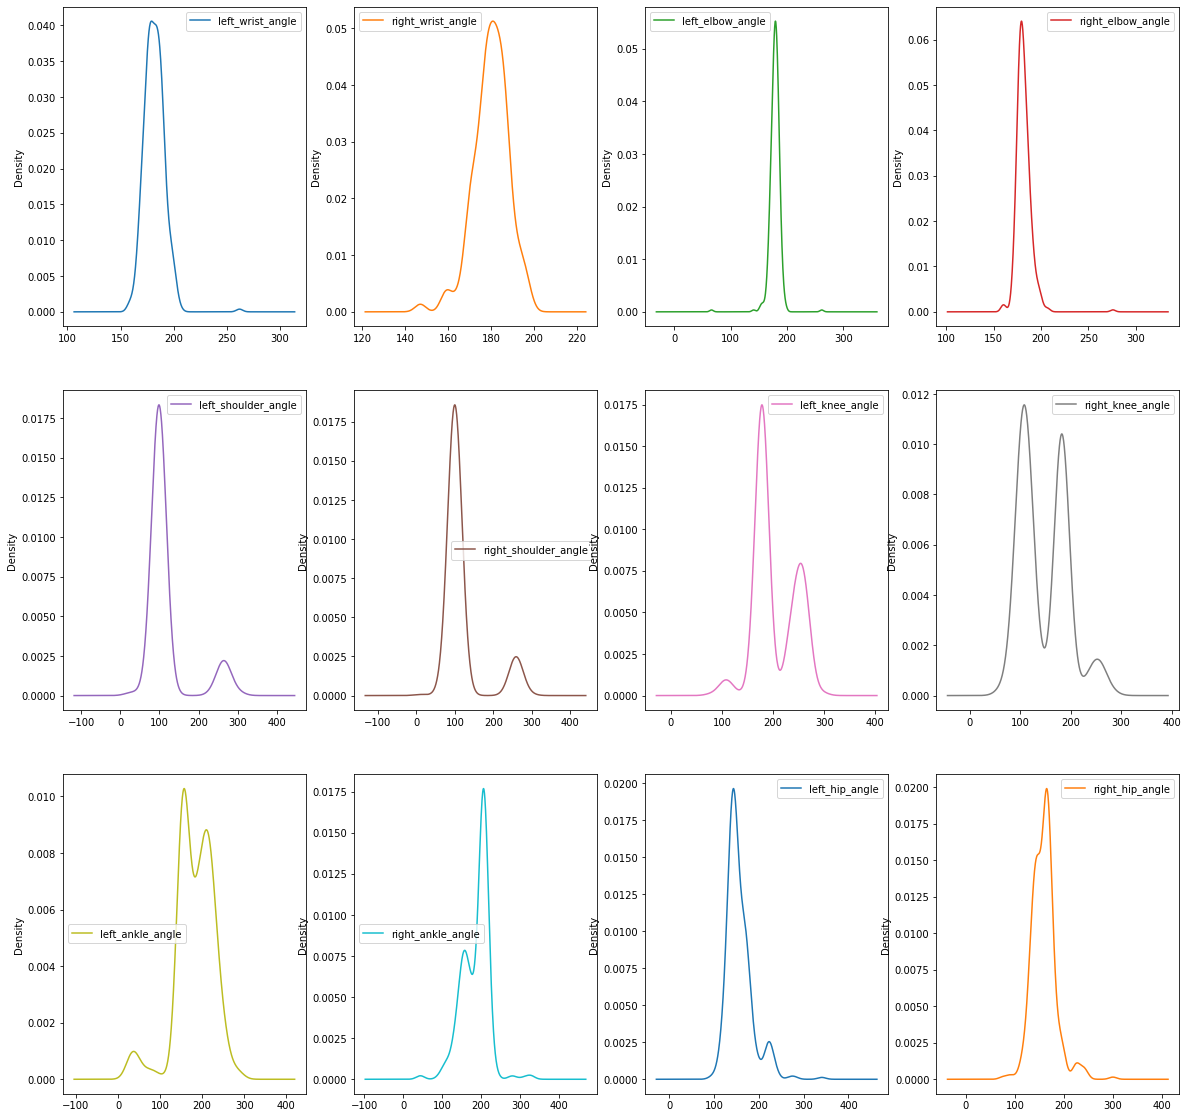

In [ ]:
num_df.plot(kind="density",layout=(3,4),subplots = True,figsize = (20,20),sharex= False)
plt.show()

In [ ]:
df.isnull().sum()

Pose                    0
left_wrist_angle        0
right_wrist_angle       0
left_elbow_angle        0
right_elbow_angle       0
left_shoulder_angle     0
right_shoulder_angle    0
left_knee_angle         0
right_knee_angle        0
left_ankle_angle        0
right_ankle_angle       0
left_hip_angle          0
right_hip_angle         0
dtype: int64

#Correlation

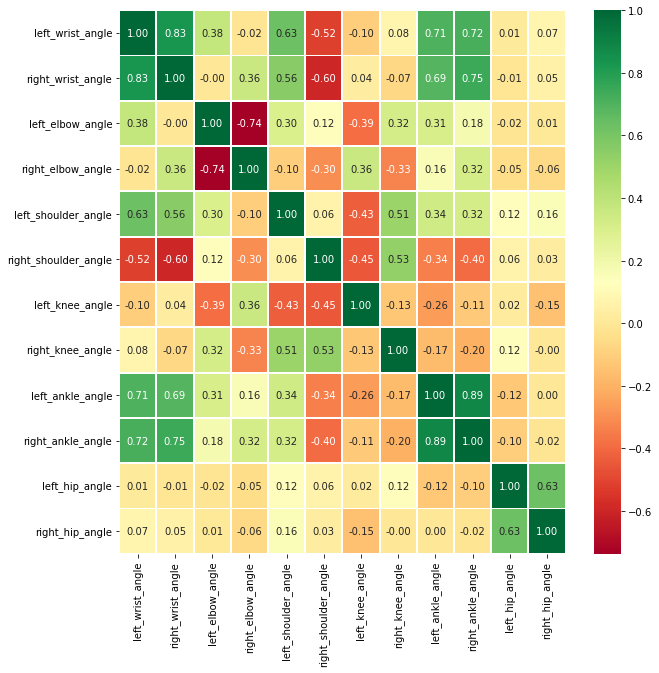

In [ ]:
plt.figure(figsize = (10, 10))
corr = df.corr()
sns.heatmap(corr, linewidths = 1, annot = True, fmt = ".2f",cmap="RdYlGn")
plt.show()

#Splitting into train and test data

In [ ]:
x = df.drop('Pose', axis = 1)
y = df['Pose']

In [ ]:
x

,left_wrist_angle,right_wrist_angle,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_knee_angle,right_knee_angle,left_ankle_angle,right_ankle_angle,left_hip_angle,right_hip_angle
0,240.255119,219.064829,186.546291,179.376141,208.260226,156.583389,182.248808,181.818635,237.194045,265.140039,97.845802,85.783682
1,147.264774,154.936741,163.135131,152.664823,179.028436,187.064029,179.408472,180.649002,106.488878,85.529652,79.359123,98.865720
2,204.766079,204.057349,209.600922,208.148708,186.408119,171.864904,180.285860,186.046362,268.700678,255.039570,95.841898,83.899940
3,143.595911,146.162727,168.976544,165.766879,189.167956,182.282271,182.500618,185.901810,98.671915,95.920489,238.954509,300.089686
4,144.180542,138.206767,168.418526,167.773910,156.250100,203.840391,185.518514,185.448147,91.651908,83.828846,80.385431,98.972627
...,...,...,...,...,...,...,...,...,...,...,...,...
884,198.070012,185.271524,174.961145,189.659893,96.576950,97.594643,257.819084,186.246052,138.767124,100.750967,156.370622,139.658970
885,177.614056,172.647621,185.962278,180.441152,98.980126,106.122254,167.905243,108.708435,160.754169,204.563420,121.057633,161.291565
886,190.407711,184.635463,169.905377,186.674469,96.089894,83.569341,236.500044,185.194429,152.850318,157.879055,150.309753,133.381905
887,179.816947,173.290163,176.063600,185.025152,100.277495,96.583777,168.187607,110.901905,211.057415,203.648519,142.147121,146.587728


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42,shuffle = True)

##Testing ml models

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score,precision_score,f1_score,roc_auc_score,r2_score,mean_squared_error


###KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnm = KNeighborsClassifier(n_neighbors=4)
knnm.fit(x_train,y_train)
knnm.score(x_test,y_test)
y_knn_pred = knnm.predict(x_test)

In [ ]:
print("Accuracy Score: ", accuracy_score(y_test,y_knn_pred))
print("Classification Report: ")
print()
print(classification_report(y_test,y_knn_pred))


Accuracy Score:  0.9943820224719101
Classification Report: 

              precision    recall  f1-score   support

     downdog       1.00      0.98      0.99        53
     goddess       1.00      1.00      1.00        25
       plank       1.00      1.00      1.00        29
    warrior2       0.99      1.00      0.99        71

    accuracy                           0.99       178
   macro avg       1.00      1.00      1.00       178
weighted avg       0.99      0.99      0.99       178



###SVC

In [ ]:
from sklearn.svm import SVC
svmcm = SVC(C=0.1, kernel='poly')
svmcm.fit(x_train,y_train.values.ravel())
svmcm.score(x_test,y_test)
y_svmcm_pred = svmcm.predict(x_test)

In [ ]:
print("Accuracy Score: ", accuracy_score(y_test, svmcm.predict(x_test)))
print("Classification Report: ")
print()
print(classification_report(y_test,y_svmcm_pred))

Accuracy Score:  0.9887640449438202
Classification Report: 

              precision    recall  f1-score   support

     downdog       1.00      0.96      0.98        53
     goddess       1.00      1.00      1.00        25
       plank       0.97      1.00      0.98        29
    warrior2       0.99      1.00      0.99        71

    accuracy                           0.99       178
   macro avg       0.99      0.99      0.99       178
weighted avg       0.99      0.99      0.99       178



###Decision Tree Classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_test,y_test)
y_pred = dtc.predict(x_test)


In [ ]:
print("Accuracy Score: ", accuracy_score(y_test,y_pred))
print("Classification Report: ")
print()
print(classification_report(y_test,y_pred))

Accuracy Score:  0.9831460674157303
Classification Report: 

              precision    recall  f1-score   support

     downdog       0.98      0.96      0.97        53
     goddess       1.00      0.96      0.98        25
       plank       0.97      1.00      0.98        29
    warrior2       0.99      1.00      0.99        71

    accuracy                           0.98       178
   macro avg       0.98      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178



###Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)
y_pred = rf.predict(x_test)

In [ ]:
print("Accuracy Score: ", accuracy_score(y_test,y_pred))
print("Classification Report: ")
print()
print(classification_report(y_test,y_pred))

Accuracy Score:  0.9887640449438202
Classification Report: 

              precision    recall  f1-score   support

     downdog       1.00      0.96      0.98        53
     goddess       1.00      1.00      1.00        25
       plank       0.97      1.00      0.98        29
    warrior2       0.99      1.00      0.99        71

    accuracy                           0.99       178
   macro avg       0.99      0.99      0.99       178
weighted avg       0.99      0.99      0.99       178



#ML models

##**Model Selection for the given dataset**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [ ]:
xgb=XGBClassifier(random_state=90,n_jobs=-1,eval_metric='mlogloss')

In [ ]:
rfc=RandomForestClassifier(n_jobs=-1,random_state=42)

In [ ]:
adb = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.6)

In [ ]:
svmcm = SVC(C=0.1, kernel='poly')

In [ ]:
svmrbf = SVC(C=0.1, kernel='rbf')

In [ ]:
knnm = KNeighborsClassifier(n_neighbors=4)

In [ ]:
dtc = DecisionTreeClassifier()

**Cross Validation_F1_Score**

In [ ]:
def make_scorer_acc(estimator,x_train,y_train):
    y_pred=estimator.predict(x_train)
    return accuracy_score(y_train,y_pred)

In [ ]:
def make_scorer(estimator,x_train,y_train):
    y_pred=estimator.predict(x_train)
    return f1_score(y_train,y_pred,average="macro")

In [ ]:
cross_val_score(xgb,x_train,y_train,cv=5,scoring=make_scorer).mean()

0.9782318267339015

In [ ]:
cross_val_score(rfc,x_train,y_train,cv=5,scoring=make_scorer).mean()

0.9877453004206302

In [ ]:
cross_val_score(adb,x_train,y_train,cv=5,scoring=make_scorer).mean()

0.7874519073526639

In [ ]:
cross_val_score(svmcm,x_train,y_train,cv=5,scoring=make_scorer).mean()

0.9838243875647213

In [ ]:
cross_val_score(svmrbf,x_train,y_train,cv=5,scoring=make_scorer).mean()

0.9339137316880569

In [ ]:
cross_val_score(knnm,x_train,y_train,cv=5,scoring=make_scorer).mean()

0.9877977644256399

In [ ]:
cross_val_score(dtc,x_train,y_train,cv=5,scoring=make_scorer).mean()

0.9785827203906257

**visualizing**

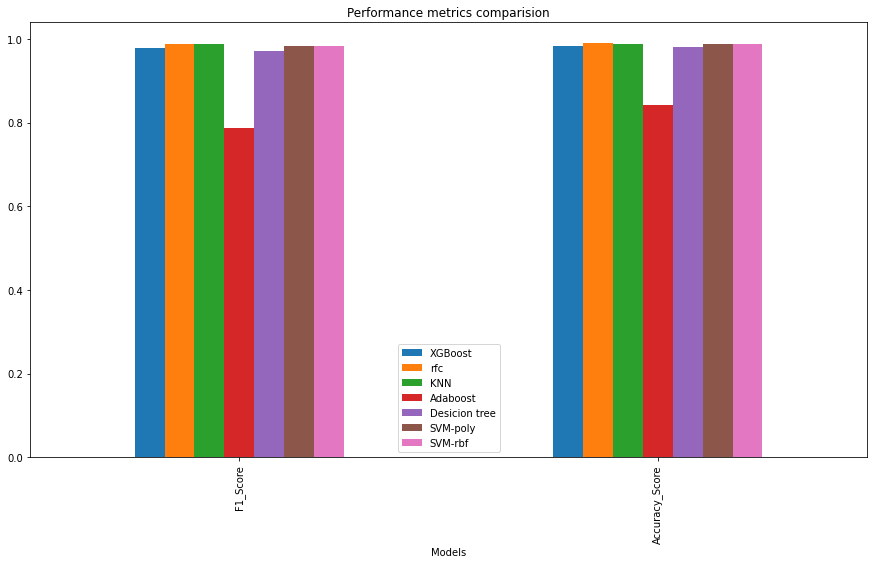

In [ ]:
# importing package
import matplotlib.pyplot as plt
import pandas as pd

xgbf = []
xgbf.append('XGBoost')
xgbf.append(cross_val_score(xgb,x_train,y_train,cv=5,scoring=make_scorer).mean())
xgbf.append(cross_val_score(xgb,x_train,y_train,cv=5,scoring=make_scorer_acc).mean())

rfcf = []
rfcf.append('RFC')
rfcf.append(cross_val_score(rfc,x_train,y_train,cv=5,scoring=make_scorer).mean())
rfcf.append(cross_val_score(rfc,x_train,y_train,cv=5,scoring=make_scorer_acc).mean())


knnmf = []
knnmf.append('k nearest neighbours')
knnmf.append(cross_val_score(knnm,x_train,y_train,cv=5,scoring=make_scorer).mean())
knnmf.append(cross_val_score(knnm,x_train,y_train,cv=5,scoring=make_scorer_acc).mean())


abdf = []
abdf.append('Adaboost')
abdf.append(cross_val_score(adb,x_train,y_train,cv=5,scoring=make_scorer).mean())
abdf.append(cross_val_score(adb,x_train,y_train,cv=5,scoring=make_scorer_acc).mean())


dtcf = []
dtcf.append('Decision Tree Classifier')
dtcf.append(cross_val_score(dtc,x_train,y_train,cv=5,scoring=make_scorer).mean())
dtcf.append(cross_val_score(dtc,x_train,y_train,cv=5,scoring=make_scorer_acc).mean())


svmcmf = []
svmcmf.append('Support Vector Classifier- poly kernel')
svmcmf.append(cross_val_score(svmcm,x_train,y_train,cv=5,scoring=make_scorer).mean())
svmcmf.append(cross_val_score(svmcm,x_train,y_train,cv=5,scoring=make_scorer_acc).mean())


svmrbf = []
svmrbf.append('Support Vector Classifier - rbf kernel')
svmrbf.append(cross_val_score(svmcm,x_train,y_train,cv=5,scoring=make_scorer).mean())
svmrbf.append(cross_val_score(svmcm,x_train,y_train,cv=5,scoring=make_scorer_acc).mean())


graph_arr2 = ['Accuracy_Score',xgbf[2],rfcf[2],knnmf[2],abdf[2],dtcf[2],svmcmf[2],svmrbf[2]]
graph_arr1 = ['F1_Score',xgbf[1],rfcf[1],knnmf[1],abdf[1],dtcf[1],svmcmf[1],svmrbf[1]]

df = pd.DataFrame([graph_arr1,graph_arr2],columns=['Models','XGBoost', 'rfc','KNN','Adaboost','Desicion tree','SVM-poly','SVM-rbf'])

df.plot(x='Models',kind='bar',stacked=False,title='Performance metrics comparision',figsize=(15, 8))

##With Test Data

### **RFC**

In [ ]:
RFC.fit(x_train,y_train)

NameError: ignored

In [ ]:
y_predict_rfc = RFC.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,f1_score,precision_score,recall_score,roc_auc_score,accuracy_score,confusion_matrix

rfc = []
rfc.append('RandomForestClassifier')
rfc.append(accuracy_score(y_test, y_predict_rfc))
rfc.append(f1_score(y_test, y_predict_rfc,average='macro'))


print('Accuracy Score: '+str(rfc[1]))
print('F1 Score: '+str(rfc[2]))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_predict_rfc))